In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
'''
Exercise
At the same level as this notebook on github, there is an Exercise folder that contains carprices.csv. 
This file has car sell prices for 3 different models. First plot data points on a scatter plot chart to 
see if linear regression model can be applied. 
If yes, then build a model that can answer following questions,
1) Predict price of a mercedez benz that is 4 yr old with mileage 45000
2) Predict price of a BMW X5 that is 7 yr old with mileage 86000
3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())'''

'\nExercise\nAt the same level as this notebook on github, there is an Exercise folder that contains carprices.csv. \nThis file has car sell prices for 3 different models. First plot data points on a scatter plot chart to \nsee if linear regression model can be applied. \nIf yes, then build a model that can answer following questions,\n1) Predict price of a mercedez benz that is 4 yr old with mileage 45000\n2) Predict price of a BMW X5 that is 7 yr old with mileage 86000\n3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())'

In [3]:
df=pd.read_csv("carprices.csv")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [4]:
df.columns

Index(['Car Model', 'Mileage', 'Sell Price($)', 'Age(yrs)'], dtype='object')

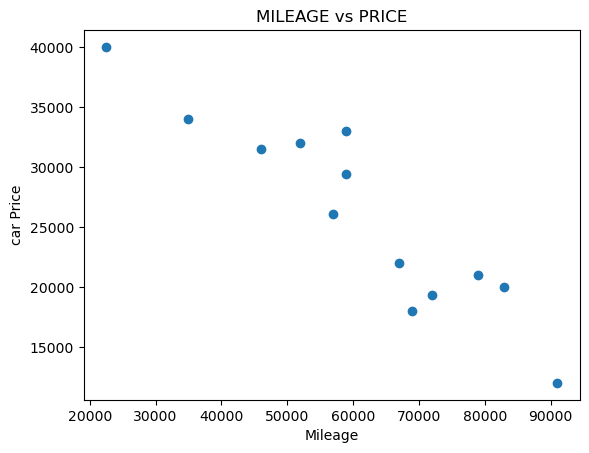

In [5]:
x=df['Mileage']
y=df['Sell Price($)']
plt.xlabel('Mileage')
plt.ylabel('car Price')
plt.title("MILEAGE vs PRICE")
plt.scatter(x,y)

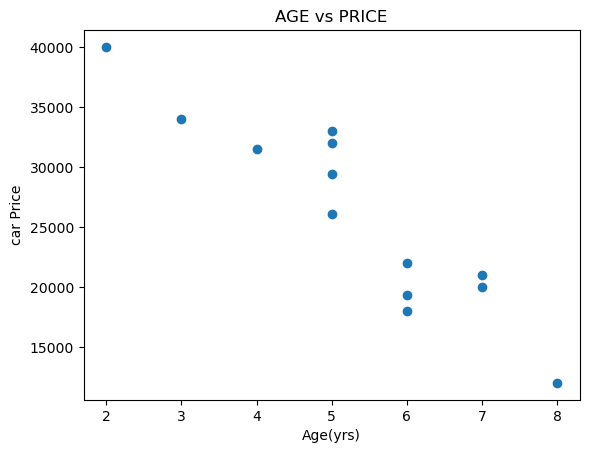

In [6]:
x=df['Age(yrs)']
y=df['Sell Price($)']
plt.xlabel('Age(yrs)')
plt.ylabel('car Price')
plt.title("AGE vs PRICE")
plt.scatter(x,y)

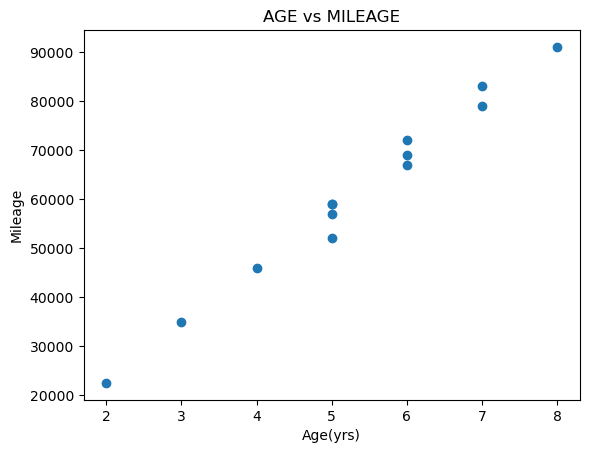

In [7]:
x=df['Age(yrs)']
y=df['Mileage']
plt.xlabel('Age(yrs)')
plt.ylabel('Mileage')
plt.title("AGE vs MILEAGE")
# plt.plot(x,y , marker="+")
plt.scatter(x,y)

In [8]:
#  object of the model
# reg=linear_model.LinearRegression()
# 

In [9]:
# Perform one hot encoding for the car model 
#  get the categorical column using get dummies ()
dummies=pd.get_dummies(df['Car Model']).astype(int)

In [10]:
#  concatenate dummies with original data frame 
marged=pd.concat([df,dummies],axis='columns')
marged

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [13]:
columns_droped=marged[["Car Model",'BMW X5']]
# marged.drop(columns_droped)

In [16]:
marged=marged.drop(columns_droped, axis=1)
marged

,Mileage,Sell Price($),Age(yrs),Audi A5,Mercedez Benz C class
0,69000,18000,6,0,0
1,35000,34000,3,0,0
2,57000,26100,5,0,0
3,22500,40000,2,0,0
4,46000,31500,4,0,0
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,1


In [18]:
marged.columns

Index(['Mileage', 'Sell Price($)', 'Age(yrs)', 'Audi A5',
       'Mercedez Benz C class'],
      dtype='object')

In [19]:
#  creating a linear regression model
reg=linear_model.LinearRegression()
# create an object
x=marged[['Mileage','Age(yrs)','Audi A5','Mercedez Benz C class']]
y=df['Sell Price($)']
# train my model 
reg.fit(x,y)

LinearRegression()

In [23]:
# 1) Predict price of a mercedez benz that is 4 yr old with mileage 45000
quiz1=pd.DataFrame({'Mileage': [45000], 'Age(yrs)': [4], 'Audi A5': [0], 'Mercedez Benz C class': [1]})
reg.predict(quiz1)

array([36991.31721031])

In [31]:
# 2) Predict price of a BMW X5 that is 7 yr old with mileage 86000

In [33]:
quiz2=pd.DataFrame({'Mileage':[69000],'Age(yrs)':[6],'Audi A5':[0],'Mercedez Benz C class':[0]})
reg.predict(quiz2)

array([18705.27236456])

In [35]:
# 3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())
reg.score(x,y)

0.9417050937281082

In [37]:
# USING ONE HOT ENCODING 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dfle=df
dfle.columns

Index(['Car Model', 'Mileage', 'Sell Price($)', 'Age(yrs)'], dtype='object')

In [39]:
dfle['Car Model']=le.fit_transform(dfle['Car Model'])

In [41]:
x=dfle[['Car Model', 'Mileage', 'Age(yrs)']].values
x

array([[    1, 69000,     6],
       [    1, 35000,     3],
       [    1, 57000,     5],
       [    1, 22500,     2],
       [    1, 46000,     4],
       [    0, 59000,     5],
       [    0, 52000,     5],
       [    0, 72000,     6],
       [    0, 91000,     8],
       [    2, 67000,     6],
       [    2, 83000,     7],
       [    2, 79000,     7],
       [    2, 59000,     5]], dtype=int64)

In [43]:
y=dfle['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [67]:
import joblib 
joblib.dump(reg,"EXERcise 2 module to predict car prices basing on brand")

['EXERcise 2 module to predict car prices basing on brand']